In [1]:
# Generate Data Vectors
import numpy as np
import matplotlib.pyplot as plt

plot_kws = dict(linewidth=2)

dt = 0.1

times = np.arange(0, 10+dt, dt)
param = np.sin(times)

times_test = np.arange(10, 20+dt, dt)
param_test = np.sin(times_test)
n_test = len(times_test)

In [2]:
def paramforecast(param, times, n):
    y0s = param[-3:-1]
    H = times[-1] - times[-2]
    N = len(param)
    
    def BD2(ys, h, H):
        y_dot_next = ((ys[2] - 2*ys[1] + ys[0])/h**2)*H
        return y_dot_next
    
    def BD1(ys, h):
        y_dot = (ys[1] - ys[0])/h
        return y_dot
    
    t = np.zeros((N+n))
    y = np.zeros((N+n))
    
    y[0:N] = param
    t[0:N] = times
    t[N+1:N+n] = np.arange(times[N-1]+H, times[N-1]+n*H, H)
    
    
    for i in np.arange(N, N+n-1, 1):
        k1 = BD1(y[i-2:i], H)
        k2 = BD2(y[i-3:i], H, H/2)
        k3 = BD2(y[i-3:i], H, H/2)
        k4 = BD2(y[i-3:i], H, H)
        y[i+1] = y[i] + (H / 6.) * (k1 + 2*k2 + 2*k3 + k4)
    return (y[N+1:N+n], t[N+1:N+n])

[10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1 11.2 11.3 11.4
 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5 12.6 12.7 12.8
 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9 14.  14.1 14.2
 14.3 14.4 14.5 14.6 14.7 14.8 14.9 15.  15.1 15.2 15.3 15.4 15.5 15.6
 15.7 15.8 15.9 16.  16.1 16.2 16.3 16.4 16.5 16.6 16.7 16.8 16.9 17.
 17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9 18.  18.1 18.2 18.3 18.4
 18.5 18.6 18.7 18.8 18.9 19.  19.1 19.2 19.3 19.4 19.5 19.6 19.7 19.8
 19.9 20.  20.1]


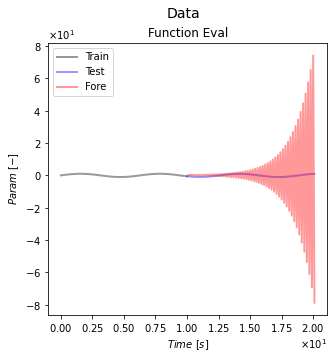

In [3]:
(YY, TT) = paramforecast(param, times, n_test)

print(TT)

# figure 1: Ensemble Models MSE
fig = plt.figure(figsize=(5, 5))
fig.suptitle("Data", fontsize=14)
ax = plt.axes()
ax.ticklabel_format(axis='both', style='sci', scilimits=(0,0), useOffset=False, useMathText=True, useLocale=True)
ax.plot(times, param, "k", label='Train',alpha=0.4, **plot_kws)
ax.plot(times_test, param_test, "b", label='Test',alpha=0.4, **plot_kws)
ax.plot(TT, YY, "r", label='Fore',alpha=0.4, **plot_kws)
ax.set_title('Function Eval')
ax.set(xlabel="$Time~[s]$", ylabel="$Param~[-]$")
ax.legend()

In [4]:
for i in (np.arange(0,10,1)+3):
    print(i)


3
4
5
6
7
8
9
10
11
12
